<b><h1>Spotify Tracks Attributes and Popularity</h1></b>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# 🌐 2. Load Dataset
df = pd.read_csv('dataset.csv')

df = df.drop(columns=['index', 'track_id', 'artists', 'album_name', 'track_name'])  # Drop non-numeric
df = df.dropna()  # Remove missing values
df['explicit'] = df['explicit'].astype(int)  # Convert boolean to int
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['track_genre'] = le.fit_transform(df['track_genre'])





In [ ]:
# 🎯 4. Select Features & Target
X = df.drop(columns=['popularity'])
y = df['popularity']

# 🔀 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 🌲 6. Train Random Forest
# 🔀 Sampling
df_sampled = df.sample(n=20000, random_state=42)

# ✅ Train-test split
X = df_sampled.drop(columns=['popularity'])
y = df_sampled['popularity']

# 🌲 Faster Random Forest
model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)


,n_estimators,50
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# 🔮 7. Predict & Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error: {mse:.2f}")
print(f"📈 R² Score: {r2:.2f}")

📉 Mean Squared Error: 222.62
📈 R² Score: 0.55


c:\Users\komal\OneDrive\Desktop\ML\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


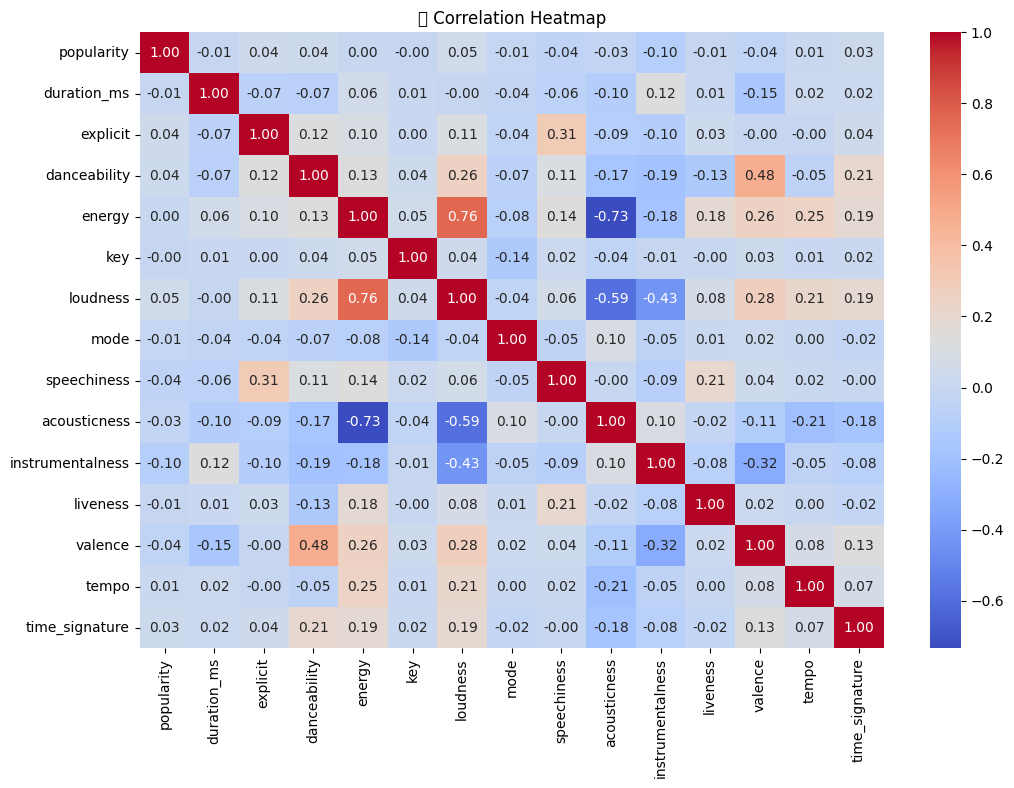

In [12]:
# 📊 8. Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔍 Correlation Heatmap")
plt.show()

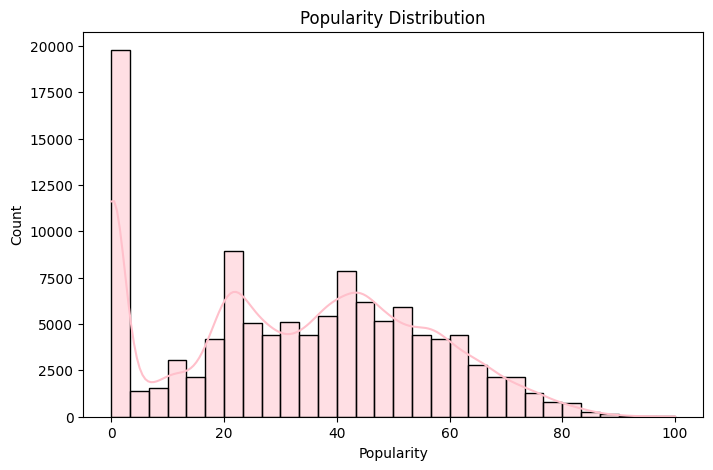

In [15]:
# 📉 9. Popularity Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=30, kde=True, color='pink')
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

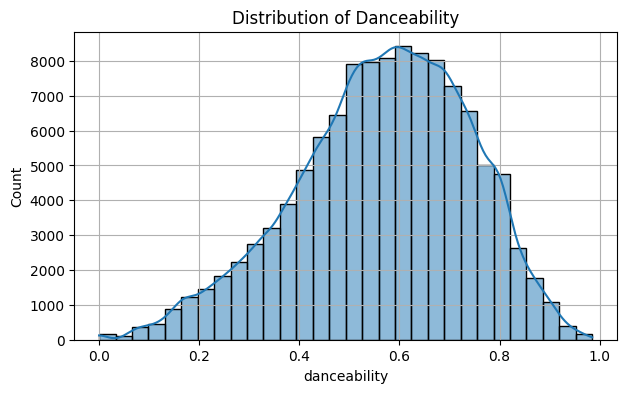

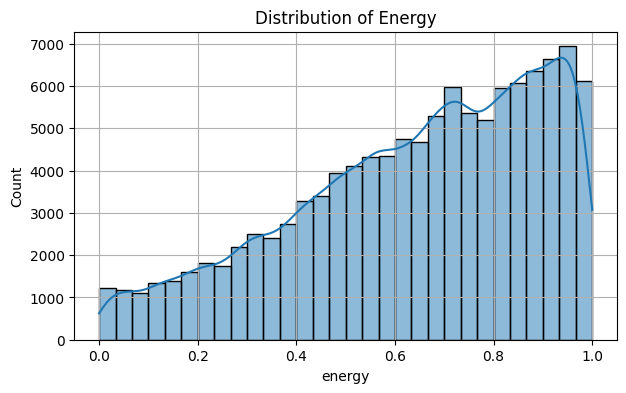

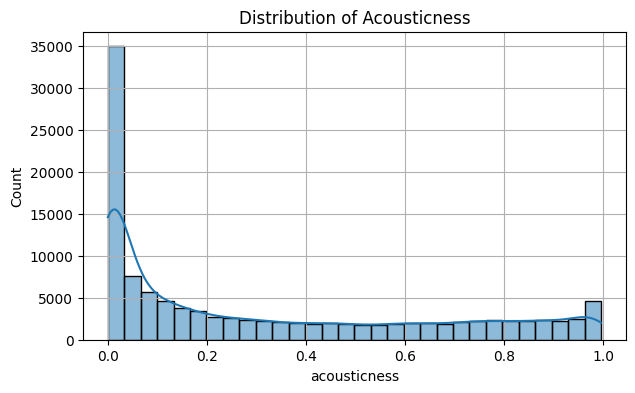

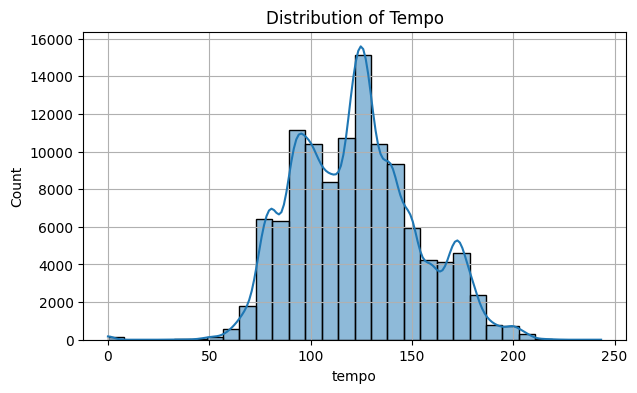

In [17]:
# 📈 10. Feature Distributions
feature_cols = ['danceability', 'energy', 'acousticness', 'tempo']
for col in feature_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

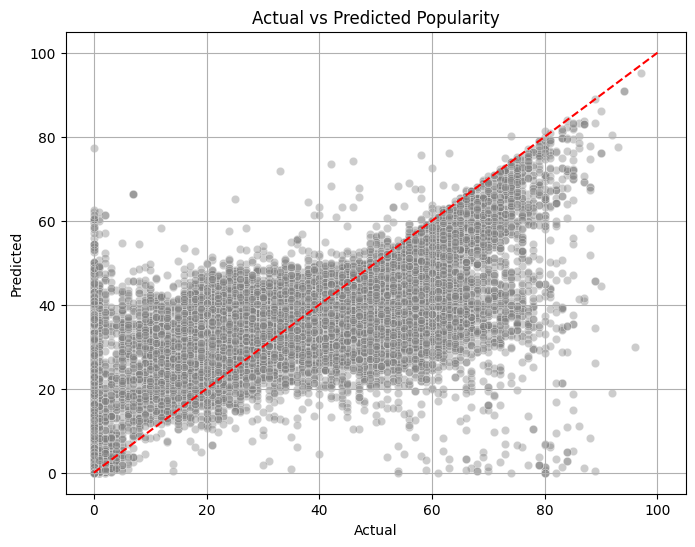

In [21]:
# 🎯 11. Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='grey')
plt.plot([0, 100], [0, 100], 'r--')  # Reference line
plt.title("Actual vs Predicted Popularity")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()

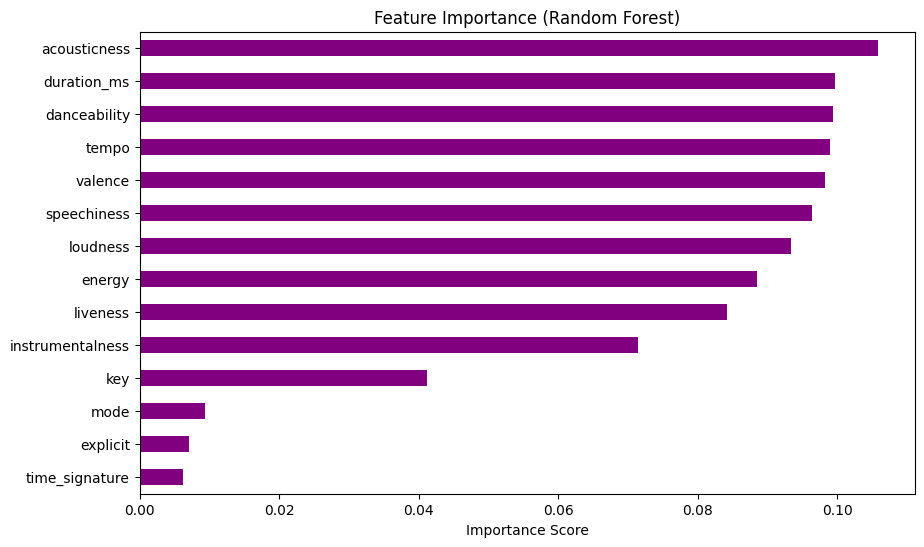

In [24]:
# 🧠 12. Feature Importance
importances = model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=True)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='barh', color='purple')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [25]:
# Show actual vs predicted for first 10 samples
results = pd.DataFrame({
    'Actual Popularity': y_test.values[:10],
    'Predicted Popularity': y_pred[:10].round(2)
})
print(results)


   Actual Popularity  Predicted Popularity
0                 50                 46.34
1                 11                 18.73
2                  0                 27.24
3                  0                  0.03
4                 57                 29.84
5                 38                 38.00
6                 21                 25.48
7                 54                 34.10
8                 29                 36.93
9                 48                 45.52


In [26]:
# View full side-by-side prediction (optional)
full_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred.round(2)
})
full_results.head(20)


,Actual,Predicted
0,50,46.34
1,11,18.73
2,0,27.24
3,0,0.03
4,57,29.84
5,38,38.00
6,21,25.48
7,54,34.10
8,29,36.93
9,48,45.52


In [28]:
model.score(X_test, y_test)  # Evaluate model performance on test set

0.5488815703827654